<center>
<h1>Complessità nei sistemi sociali</h1>
<h3>Laurea Magistrale in Fisica Dei Sistemi Complessi</h3> 
<h3>A.A. 2016/17</h3>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<h2>Notebook 2 - Data import and network representation</h2>
</center>

Here, we play a bit with some network datasets.

We analyze the dataset 'cit-HepTh' available from the SNAP repository: http://snap.stanford.edu/data/index.html

There are several other repositories of network datasets, for instance:
- http://konect.uni-koblenz.de/
- http://www-personal.umich.edu/~mejn/netdata/
- http://networkrepository.com/
- http://cnets.indiana.edu/resources/data-repository/
- http://www.sociopatterns.org/datasets/

In [1]:
import sys, math

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Basic network import and representation

In [3]:
import collections as col

We use a dictionary that associates a key (node) to a list of nodes (neighbours)

In [5]:
links_out=col.defaultdict(list)
print (links_out)

defaultdict(<class 'list'>, {})


We open the file containing the network and read each line

In [6]:
fh=open('./cit-HepTh.txt','r')

In [7]:
s=fh.readlines()

In [8]:
s[:5]

['# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt \n',
 '# Paper citation network of Arxiv High Energy Physics Theory category\n',
 '# Nodes: 27770 Edges: 352807\n',
 '# FromNodeId\tToNodeId\n',
 '1001\t9304045\n']

In [9]:
s[0].strip()

'# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt'

In [10]:
for line in s:
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    t=line.strip().split()
    if t[0]!='#':
        #the first lines are comments
        origin=int(t[0])
        dest=int(t[1])
        links_out[origin].append(dest)
    
#close the file
fh.close()

How many nodes are in the network?

In [11]:
tot_nodes=len(links_out)
print (tot_nodes)

25059


We calculate the out-degree distribution of the network.

In [12]:
degree={}

for i in links_out:

    deg=len(links_out[i])

    if deg in degree:
        degree[deg]+=1
    else:
        degree[deg]=1

In [14]:
print (degree.keys())

dict_keys([83, 1, 7, 4, 2, 40, 9, 27, 10, 14, 21, 25, 17, 15, 19, 16, 29, 53, 28, 22, 37, 39, 35, 20, 26, 32, 23, 6, 11, 30, 41, 65, 24, 31, 34, 56, 18, 13, 58, 36, 8, 42, 47, 52, 38, 5, 3, 72, 121, 54, 75, 12, 55, 84, 59, 33, 51, 46, 63, 44, 50, 73, 71, 74, 45, 165, 126, 214, 562, 68, 64, 48, 57, 134, 49, 216, 154, 61, 159, 85, 359, 43, 78, 60, 62, 66, 157, 67, 98, 70, 115, 104, 86, 207, 99, 109, 81, 123, 97, 100, 167, 91, 201, 69, 125, 77, 89, 79, 87, 90, 82, 106, 263, 143, 102, 80, 158, 95, 181, 274, 76, 122, 175, 149, 212, 101, 302, 96, 120, 200, 108, 226, 142, 107, 88, 246, 160, 94, 93, 135, 146, 211, 124, 198, 177, 289, 169, 180, 170, 156, 92, 103, 139, 136, 112])


We export the degree distribution to an output file.

In [15]:
s_deg=sorted(degree.keys())

In [16]:
fout=open('./degree_out_distri.dat','w')
for d in s_deg:
    deg_freq=float(degree[d])/tot_nodes 
    fout.write(str(d)+'  '+str(deg_freq)+'\n')
fout.close()

In [19]:
for i in degree.items():
    print (i)

(83, 6)
(1, 2449)
(7, 1087)
(4, 1405)
(2, 1951)
(40, 104)
(9, 847)
(27, 250)
(10, 790)
(14, 622)
(21, 398)
(25, 333)
(17, 503)
(15, 556)
(19, 429)
(16, 519)
(29, 246)
(53, 32)
(28, 244)
(22, 384)
(37, 135)
(39, 114)
(35, 162)
(20, 412)
(26, 284)
(32, 194)
(23, 339)
(6, 1172)
(11, 771)
(30, 240)
(41, 98)
(65, 17)
(24, 304)
(31, 184)
(34, 166)
(56, 31)
(18, 498)
(13, 640)
(58, 35)
(36, 149)
(8, 975)
(42, 91)
(47, 60)
(52, 39)
(38, 111)
(5, 1272)
(3, 1657)
(72, 6)
(121, 4)
(54, 34)
(75, 8)
(12, 651)
(55, 37)
(84, 4)
(59, 23)
(33, 160)
(51, 45)
(46, 55)
(63, 23)
(44, 77)
(50, 45)
(73, 11)
(71, 13)
(74, 7)
(45, 61)
(165, 1)
(126, 2)
(214, 1)
(562, 1)
(68, 10)
(64, 17)
(48, 51)
(57, 33)
(134, 3)
(49, 48)
(216, 1)
(154, 3)
(61, 10)
(159, 1)
(85, 3)
(359, 1)
(43, 81)
(78, 7)
(60, 14)
(62, 16)
(66, 15)
(157, 1)
(67, 14)
(98, 1)
(70, 14)
(115, 2)
(104, 4)
(86, 5)
(207, 1)
(99, 4)
(109, 2)
(81, 5)
(123, 1)
(97, 2)
(100, 1)
(167, 1)
(91, 2)
(201, 1)
(69, 13)
(125, 1)
(77, 8)
(89, 4)
(79, 6)
(87, 1

In [20]:
from operator import itemgetter

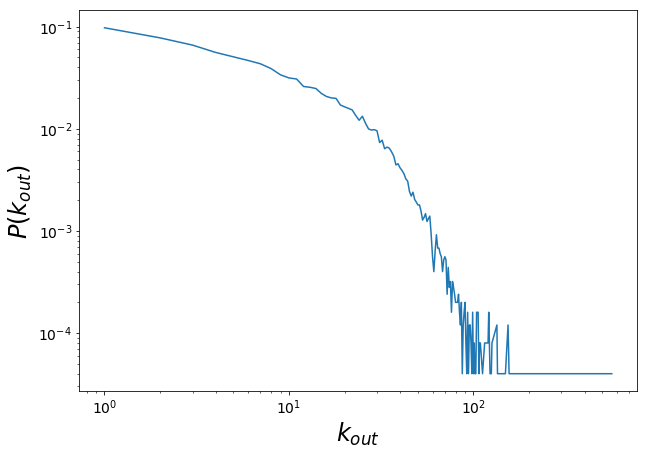

In [22]:
x=[]
y=[]
for i in sorted(degree.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes)

plt.figure(figsize=(10,7))   
plt.plot(x,y)
plt.xlabel('$k_{out}$', fontsize=24)
plt.ylabel('$P(k_{out})$', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.show()

Let's have a look at the degree-in distribution.

In [23]:
links_in=col.defaultdict(list)

fh=open('./cit-HepTh.txt','r')
#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        links_in[dest].append(origin)
    
#chiudo il file
fh.close()

In [25]:
degree_in=col.defaultdict(int)
for i in links_in.keys():
    deg=len(links_in[i])
    degree_in[deg]+=1

tot_nodes_in=len(links_in)
print (tot_nodes_in)

23180


What is the difference from an exponential distribution?

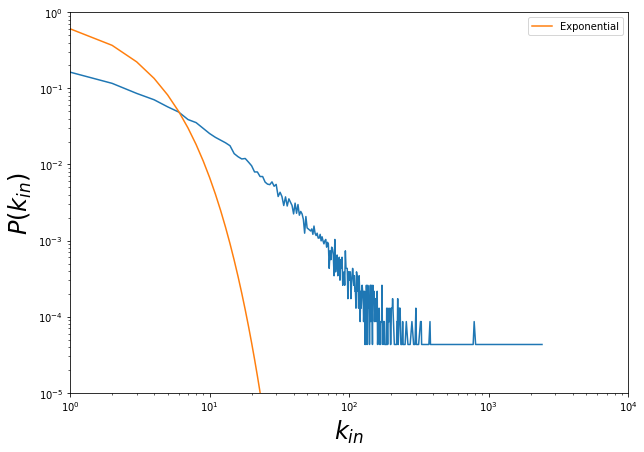

In [27]:
def f(t):
    return np.exp(-0.5*t)

x=[]
y=[]
for i in sorted(degree_in.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1])/tot_nodes_in)

plt.figure(figsize=(10,7))   
    
plt.plot(np.array(x),np.array(y))
plt.plot(np.array(x), f(np.array(x)), label='Exponential')
plt.xlabel('$k_{in}$', fontsize=24)
plt.ylabel('$P(k_{in})$', fontsize=24)
plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1])
plt.legend()
plt.show()